# Honey Bee Analysis

# 1. Introduction

# Honey Bee Colony Data

This dataset contains a record of various honey bee colony data grouped by state and quarter. The data covers years 2015-2023.

## Terms and Definitions

### Added Colonies
A new or replacement, surviving colony that was either created or purchased whole by an operation.

### Colony
A hive containing a queen honey bee and attendant worker bees and/or drone bees.

### Colony Collapse Disorder (CCD) Criteria
Colonies reported as being lost due to CCD must have fully met four criteria:

1. Little to no build-up of dead bees in the hive or at the hive entrance.
2. Rapid loss of adult honey bee population despite the presence of a queen, capped brood, and food reserves.
3. Absence or delayed robbing of the food reserves.
4. Loss not attributable to varroa or nosema loads.

Colonies lost due to CCD were collected on a quarterly basis for operations with five or more colonies.

### Lost Colony
A completely failed colony, loss of most workers, and possibly the queen. Colony is no longer viable. Sometimes referred to as a dead out.

### Maximum Colonies
Refers to the sum of colonies in a state on the first of the quarter plus all those moved into the state during that period. Maximum colonies are considered the base number from which a data user can do further analysis. It does not include the colonies that were added, lost, or renovated in the state. Colonies are counted in every state they were in during the quarter; therefore, a national level maximum number of colonies cannot be calculated due to duplication.

### Percent Lost
The state-level percentage of colonies lost is the number of colonies lost in that state divided by the maximum colonies for that state. The national level percentage of colonies lost is the total number of all colonies lost in the United States divided by the number of colonies on the first of the quarter.

### Percent Renovated
The state-level percentage of colonies renovated is the number of colonies renovated in that state divided by the maximum colonies for that state. The national level percentage of colonies renovated is the total number of all colonies renovated in the United States divided by the number of colonies on the first of the quarter.

### Renovated Colony
An existing colony that was requeened or received a nuc or package.

### Stressors
State-level colony health stressors for operations with five or more colonies are the percent of the maximum colonies reported to be affected, by quarter. The national level colony stressors are the summed number for the United States divided by the number of colonies on the first of the quarter.


## 1.1 Import Libraries & Load Data

In [21]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
# Load Data
df = pd.read_csv('../Data/data.csv')
df.head()

,Quarter,State,Colonies_Added_And_Replaced,Max_Colonies,Pct_Affected_Deadout,Pct_Affected_Disease,Pct_Affected_Other,Pct_Affected_Pesticides,Pct_Affected_Pests,Pct_Affected_Unknown,Pct_Affected_Varroa_Mites,Num_Renovated,Pct_Renovated,Max_Colonies_Percent_Change,Pct_Affected_Colony_Collapse_Disorder
0,2015_Q1,MISSISSIPPI,22000.000,76000.000,11.000,0.100,1.200,2.100,8.200,1.100,9.400,7500.000,10.000,0.000,NaN
1,2015_Q1,MONTANA,1400.000,36000.000,6.000,0.600,2.300,0.800,0.500,7.900,8.700,1100.000,3.000,0.000,NaN
2,2015_Q1,NEBRASKA,120.000,31000.000,8.000,0.100,0.300,0.500,0.100,3.000,5.900,310.000,1.000,0.000,NaN
3,2015_Q1,NEW JERSEY,570.000,9000.000,12.000,30.400,19.500,11.100,13.200,16.700,40.100,1600.000,18.000,0.000,NaN
4,2015_Q1,NEW MEXICO,190.000,7000.000,10.000,0.000,1.300,0.200,0.100,0.400,17.100,600.000,9.000,0.000,NaN


# 2. Basic Exploration

In [23]:
df.head()

,Quarter,State,Colonies_Added_And_Replaced,Max_Colonies,Pct_Affected_Deadout,Pct_Affected_Disease,Pct_Affected_Other,Pct_Affected_Pesticides,Pct_Affected_Pests,Pct_Affected_Unknown,Pct_Affected_Varroa_Mites,Num_Renovated,Pct_Renovated,Max_Colonies_Percent_Change,Pct_Affected_Colony_Collapse_Disorder
0,2015_Q1,MISSISSIPPI,22000.000,76000.000,11.000,0.100,1.200,2.100,8.200,1.100,9.400,7500.000,10.000,0.000,NaN
1,2015_Q1,MONTANA,1400.000,36000.000,6.000,0.600,2.300,0.800,0.500,7.900,8.700,1100.000,3.000,0.000,NaN
2,2015_Q1,NEBRASKA,120.000,31000.000,8.000,0.100,0.300,0.500,0.100,3.000,5.900,310.000,1.000,0.000,NaN
3,2015_Q1,NEW JERSEY,570.000,9000.000,12.000,30.400,19.500,11.100,13.200,16.700,40.100,1600.000,18.000,0.000,NaN
4,2015_Q1,NEW MEXICO,190.000,7000.000,10.000,0.000,1.300,0.200,0.100,0.400,17.100,600.000,9.000,0.000,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Quarter                                1514 non-null   object 
 1   State                                  1514 non-null   object 
 2   Colonies_Added_And_Replaced            1512 non-null   float64
 3   Max_Colonies                           1512 non-null   float64
 4   Pct_Affected_Deadout                   1504 non-null   float64
 5   Pct_Affected_Disease                   1361 non-null   float64
 6   Pct_Affected_Other                     1460 non-null   float64
 7   Pct_Affected_Pesticides                1408 non-null   float64
 8   Pct_Affected_Pests                     1453 non-null   float64
 9   Pct_Affected_Unknown                   1418 non-null   float64
 10  Pct_Affected_Varroa_Mites              1510 non-null   float64
 11  Num_

In [25]:
df.shape

(1514, 15)

In [26]:
df.isnull().sum() / len(df) * 100

Quarter                                  0.000
State                                    0.000
Colonies_Added_And_Replaced              0.132
Max_Colonies                             0.132
Pct_Affected_Deadout                     0.661
Pct_Affected_Disease                    10.106
Pct_Affected_Other                       3.567
Pct_Affected_Pesticides                  7.001
Pct_Affected_Pests                       4.029
Pct_Affected_Unknown                     6.341
Pct_Affected_Varroa_Mites                0.264
Num_Renovated                            1.717
Pct_Renovated                            7.266
Max_Colonies_Percent_Change              0.000
Pct_Affected_Colony_Collapse_Disorder   49.868
dtype: float64

In [27]:
df.describe()

,Colonies_Added_And_Replaced,Max_Colonies,Pct_Affected_Deadout,Pct_Affected_Disease,Pct_Affected_Other,Pct_Affected_Pesticides,Pct_Affected_Pests,Pct_Affected_Unknown,Pct_Affected_Varroa_Mites,Num_Renovated,Pct_Renovated,Max_Colonies_Percent_Change,Pct_Affected_Colony_Collapse_Disorder
count,1512.000,1512.000,1504.000,1361.000,1460.000,1408.000,1453.000,1418.000,1510.000,1488.000,1404.000,1514.000,759.000
mean,16405.390,158387.566,11.215,3.847,6.340,6.632,11.235,4.305,30.152,13980.793,7.709,19.837,2.875
std,64943.335,552679.200,7.343,6.971,6.588,9.117,12.916,5.062,18.785,57997.297,9.104,119.013,4.175
min,0.000,1300.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-94.091,0.000
25%,407.500,10000.000,6.000,0.400,1.900,0.600,2.300,1.100,15.700,177.500,2.000,-16.667,0.726
50%,1700.000,23000.000,10.000,1.500,4.300,3.100,7.200,2.800,27.200,865.000,5.000,0.000,1.761
75%,6000.000,81000.000,14.000,4.600,8.425,9.125,15.200,5.700,41.900,3925.000,11.000,19.897,3.672
max,736920.000,4163700.000,65.000,87.400,61.400,73.500,91.900,46.800,98.800,762550.000,77.000,2614.286,77.778


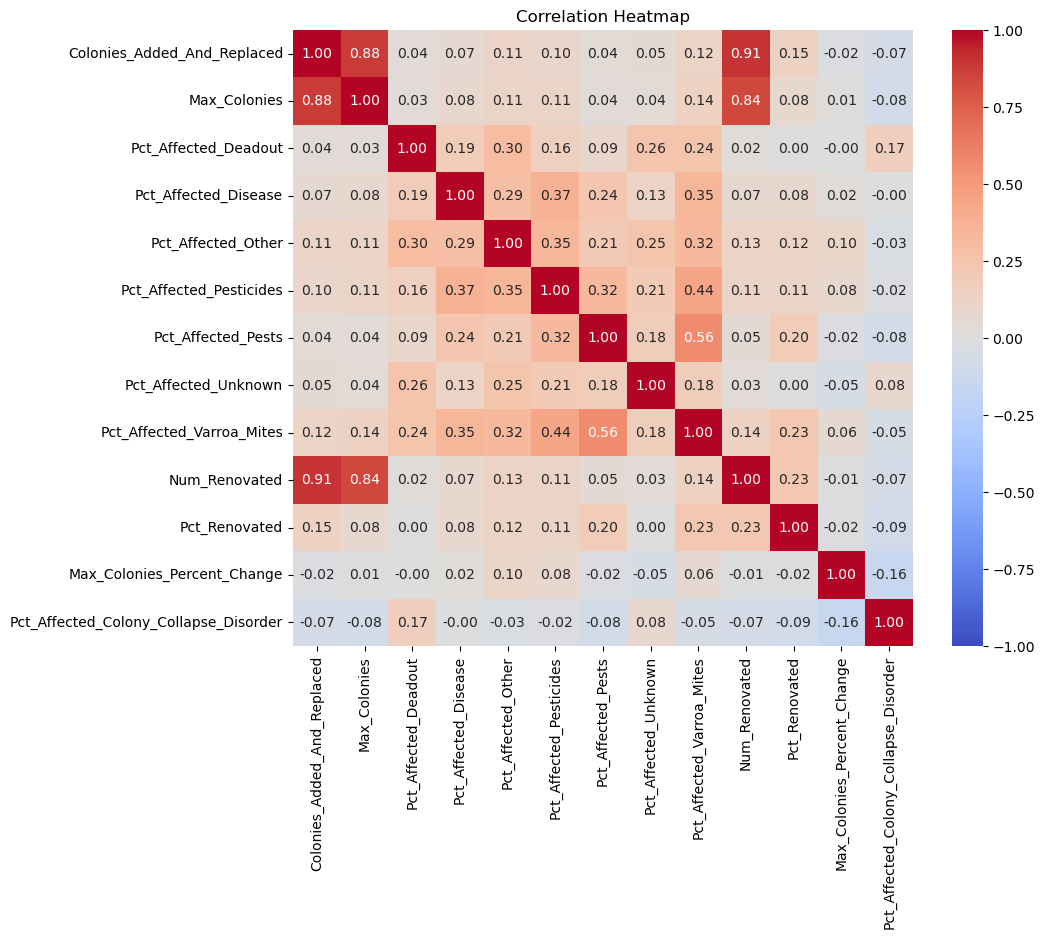

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
def f(state, y_variable):
    df_state = df[df['State'] == state]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_state, x='Quarter', y=y_variable)  # Removed unnecessary curly braces
    plt.title(f'{y_variable} Over Time in {state}')
    plt.xlabel('Quarter')
    plt.ylabel(y_variable)
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

state_dropdown = widgets.Dropdown(options=df['State'].unique(), description='Select a State:')

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot on the X-Axis:')

interact(f, state=state_dropdown, y_variable=y_var_dropdown);  # 

interactive(children=(Dropdown(description='Select a State:', options=('MISSISSIPPI', 'MONTANA', 'NEBRASKA', '…

In [30]:
states_df = df[df['State'] != 'US TOTAL']

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_highest_average(dataframe, y_variable, top_n=10):
    filtered_df = dataframe[dataframe['State'] != 'US TOTAL']
    top_values = filtered_df.groupby('State')[y_variable].mean().nlargest(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Top {top_n} States by Mean {y_variable}')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot:')
interact(plot_highest_average, dataframe=widgets.fixed(df), y_variable=y_var_dropdown, top_n=widgets.fixed(10))


interactive(children=(Dropdown(description='Select a Variable to Plot:', options=('Colonies_Added_And_Replaced…

<function __main__.plot_highest_average(dataframe, y_variable, top_n=10)>